
<div style="background-color: #008080; text-align: center; padding: 10px; border: 3px solid #008080; border-radius: 15px; font-size: 300%; color: white;font-family:newtimeroman;">Energy Consumption Analysis for Non-Interconnected zones of Colombia</div>





The following notebook aims to illustrate the state of the non-interconnected zones of Colombia through an Exploratory Data Analysis (EDA) using the dataset provided by the "Planning and Promotion Institute of Energy Solutions for Non-Interconnected Areas" (IPSE) [[1]](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g), looking for insights about the power consumption of the zones that could help governments priorize energy projects for some of them, forecast the future power consumption or warn of deficiencies in an electrical system. After the EDA, a forecast was made using machine learning techniques for the zones with a complete number of samples through these 3 and a half years, and finally a comparison with the solar and wind data for power production obtained from the [Global Solar Atlas](https://globalsolaratlas.info/download/colombia) and the [Global Wind Atlas](https://globalwindatlas.info/es/area/Colombia) was made in order to search potential renewable energy sources for these zones to supply the energy needs in the future

<br><center><img src='https://i.pinimg.com/736x/6e/89/c2/6e89c240a746892b0ea0b10714a0c867.jpg' height=500px width=1000px></center><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # for plot heatmap
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# Tips data available in the plotly express module
df_tips=px.data.tips()
# Gapminder data available in the plotly express module
population= px.data.gapminder()

### Table of contents:

* [1| Introduction](#BP)
    
* [2| EDA](#PT)
    - [2.1| Reading the data](#BC)
    - [2.2| Column information](#CI)
    - [2.3| Data Cleaning](#DC)
    - [2.4| Analysis](#A)
    - [2.5| Data visualization for a chosen zone](#DV)


* [3| Zones with complete data](#ZWCD)
    - [3.1| Power Demand](#PD)
    - [3.2| Forecasting](#F)


* [4| Solar and wind atlas](#SWA)
    - [4.1| Solar](#S)
    - [4.2| Wind](#W)


* [5| Comparing production and consumption](#CPD)


* [6| Conclusions](#C)

<a id="BP"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">1| Introduction</p>

<div style="border-radius:10px; border:#008080 solid; padding: 15px; background-color: #F5FFFA; font-size:100%; text-align:left">
📌

### **Here are some facts about non-interconnected zones of Colombia:**

* The non-interconnected zones (ZNI) are regions that **do not receive public electricity service through the national grid**, also known as the national interconnected system (SIN) [1].
* The ZNI **cover 66% of the Colombian territory (equivalent to the size of France)** and have an estimated population of 1.9 million inhabitants [1].
* The ZNI have a **low population density of 3 inhabitants/km²**, due to a complex geography that includes jungles, tropical savannas, the Amazon rainforest, the Andes mountain range, deserts and extensive coasts along the Pacific Ocean and the Caribbean Sea [1].
* The ZNI **face challenges** such as fossil fuel dependence, isolation, corruption, and armed conflict [1].
* The ZNI **have potential for renewable energy sources (RES) projects**, mainly small hydro, solar, wind and biomass [2][3].
* The ZNI **have received support** from various organizations and initiatives **to implement RES projects**, such as the Institute of Planning and Promotion of Energy Solutions for Non-Interconnected Zones (IPSE), the Renewable Energy Mini-Grids in Colombia project (REMIG), and the empowering people. Network [1][3][4].

**References:**

[1] https://empowering-people-network.siemens-stiftung.org/zonas-no-interconectadas-zni-en-colombia-un-paraiso-natural-oculto-donde-las-energias-renovables-se-enfrentan-a-los-combustibles-fosiles-el-aislamiento-y-la-corrupcion/ 

[2] https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2603023 

[3] https://www.academia.edu/8956068/Policy_Paper_Renewable_Energy_Sources_for_the_Non_Interconnected_Zones_in_Colombia 

Furthermore, the bast majority of these zones don't have a telemetry system as shown in the image below where the blue dots are the ZNI without a telemtry system and the green dots the one who have one.
Source: [El mapa de 1.710 poblados que aún se alumbran con velas en Colombia](https://www.eltiempo.com/colombia/otras-ciudades/los-lugares-que-aun-viven-sin-energia-electrica-en-colombia-325892)

Currently there are 133 telemetry systems installed from the 1750 non-interconnected zones.



<br><center>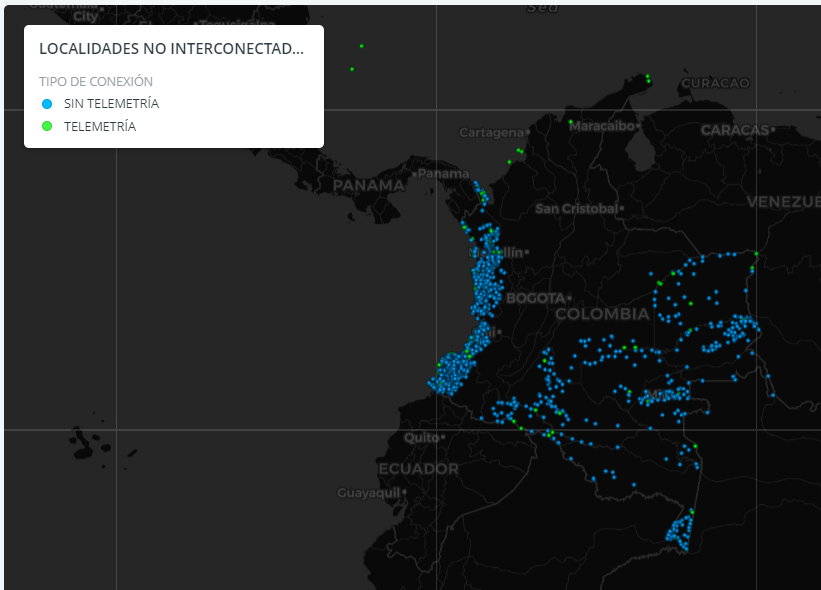</center><br>


<br><center>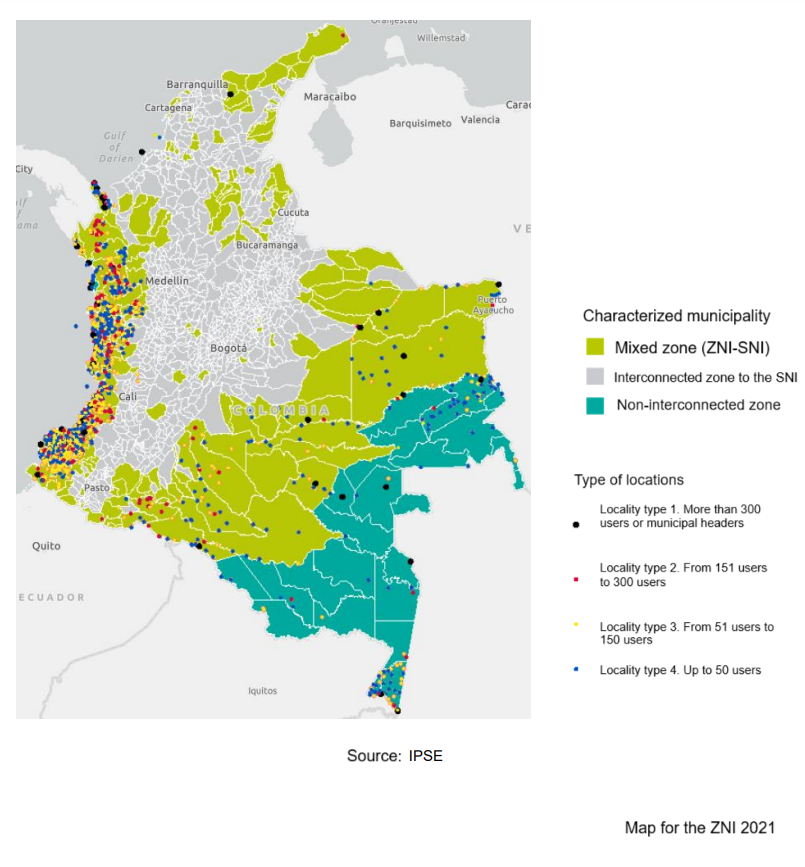</center><br>

Source: https://www.superservicios.gov.co/sites/default/files/inline-files/Informe-sectorial-de-la-prestacion-del-servicio-de-energia-2022.pdf

This EDA aims to extract useful insights from those 133 zones with telemetry systems so future projects using renewable energies could be analyzed, developed and supply the power demand in these zones.

<a id="PT"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">2| EDA</p>


<a id="BC"></a>
## <b><span style='color:#008080'>2.1</span> | Reading the data</b>


In [2]:
import numpy as np
import pandas as pd

In [3]:
zni_df = pd.read_csv('/kaggle/input/energa-en-zonas-no-interconectadas-de-colombia/Energia_en_ZNI.csv')
zni_df.head()

,ID DEPATAMENTO,DEPARTAMENTO,ID MUNICIPIO,MUNICIPIO,ID LOCALIDAD,LOCALIDAD,AÑO SERVICIO,MES SERVICIO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,DÍA DE DEMANDA MÁXIMA,FECHA DE DEMANDA MÁXIMA,PROMEDIO DIARIO EN HORAS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2020,1,3930642,1251191,7768.76,lunes,01/27/2020 02:15:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2020,1,103897,36304,227.04,miércoles,01/22/2020 07:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACÁ (ANM),91798000,TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS),2020,1,22864,9277,88.96,jueves,01/30/2020 07:30:00 PM,10.19
3,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873001,SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...,2020,1,5617,1381,53.66,jueves,01/23/2020 07:45:00 PM,4.13
4,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873002,VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA),2020,1,2217,539,39.07,miércoles,01/29/2020 07:45:00 PM,3.17


Let's rename the columns to eliminate blank spaces and translate them.

In [4]:
zni_df = zni_df.rename(columns={'ID DEPATAMENTO':'PROVINCE_ID', 'DEPARTAMENTO':'PROVINCE','ID MUNICIPIO':'CITY_ID','MUNICIPIO':'CITY','ID LOCALIDAD':'ZONE_ID','LOCALIDAD':'ZONE','AÑO SERVICIO':'SERVICE_YEAR', 
                                'MES SERVICIO':'SERVICE_MONTH','ENERGÍA ACTIVA':'ACTIVE_POWER','ENERGÍA REACTIVA':'REACTIVE_POWER','POTENCIA MÁXIMA':'MAX_POWER',
                                'DÍA DE DEMANDA MÁXIMA':'MAX_DEMAND_DAY','FECHA DE DEMANDA MÁXIMA':'MAX_DEMAND_DATE','PROMEDIO DIARIO EN HORAS':'DAILY_MEAN_HOURS'})
zni_df

,PROVINCE_ID,PROVINCE,CITY_ID,CITY,ZONE_ID,ZONE,SERVICE_YEAR,SERVICE_MONTH,ACTIVE_POWER,REACTIVE_POWER,MAX_POWER,MAX_DEMAND_DAY,MAX_DEMAND_DATE,DAILY_MEAN_HOURS
0,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2020,1,3930642,1251191,7768.76,lunes,01/27/2020 02:15:00 PM,24.00
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2020,1,103897,36304,227.04,miércoles,01/22/2020 07:15:00 PM,24.00
2,91,AMAZONAS,91798,TARAPACÁ (ANM),91798000,TARAPACÁ (TARAPACÁ (ANM) - AMAZONAS),2020,1,22864,9277,88.96,jueves,01/30/2020 07:30:00 PM,10.19
3,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873001,SAN ANTONIO DE PADUA (VIGÍA DEL FUERTE - ANTIO...,2020,1,5617,1381,53.66,jueves,01/23/2020 07:45:00 PM,4.13
4,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873002,VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA),2020,1,2217,539,39.07,miércoles,01/29/2020 07:45:00 PM,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2023,6,23364,9927,84.92,viernes,06/09/2023 06:30:00 PM,12.17
3290,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2023,6,1325908,361584,2882.40,martes,06/13/2023 12:00:00 PM,24.00
3291,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2023,6,31932,10264,132.97,miércoles,06/28/2023 12:30:00 PM,10.86
3292,99,VICHADA,99773,CUMARIBO,99773000,CUMARIBO (CUMARIBO - VICHADA),2023,6,308892,124088,660.00,viernes,06/09/2023 02:45:00 PM,24.00


In [5]:
print(f'The dataframe has {zni_df.shape[0]} rows and {zni_df.shape[1]} colummns ')

The dataframe has 3294 rows and 14 colummns 


On the other hand we can have a look at the distribution of each numerical category:

In [6]:
zni_df.describe().round(2)

,PROVINCE_ID,CITY_ID,ZONE_ID,SERVICE_YEAR,SERVICE_MONTH,ACTIVE_POWER,REACTIVE_POWER,MAX_POWER,DAILY_MEAN_HOURS
count,3294.00,3294.00,3294.00,3294.00,3294.00,3294.00,3294.00,3294.00,3294.00
mean,45.60,46008.68,46008728.48,2021.28,6.05,362813.09,107249.12,1838.50,12.02
std,29.16,29131.14,29131133.84,1.02,3.46,1786971.21,476742.23,48127.98,7.34
min,5.00,5873.00,5873000.00,2020.00,1.00,0.00,0.00,0.00,0.00
25%,19.00,19809.00,19809026.00,2020.00,3.00,5402.00,2113.25,34.77,6.30
50%,27.00,27800.00,27800000.00,2021.00,6.00,13365.00,5625.50,75.90,8.54
75%,52.00,52835.00,52835217.00,2022.00,9.00,83970.25,30803.50,223.80,19.28
max,99.00,99773.00,99773000.00,2023.00,12.00,18597794.00,4904871.00,2694319.00,24.00


<a id="CI"></a>
## <b><span style='color:#008080'>2.2</span> | Column information</b>

<div style="border-radius:10px; border:#008080 solid; padding: 15px; background-color: #F5FFFA; font-size:100%; text-align:left">



But what does active, reactive and max power mean?
In an AC (alternating current) circuit, the terms "reactive power," "active power," and "maximum power" are used to describe different aspects of power flow and performance:

1. **Reactive Power (Q)  [kVARh]**:
   - Reactive power is a measure of the power that oscillates back and forth between the source and the load in an AC circuit.
   - It is expressed in volt-amperes reactive (VAR).
   - Reactive power is required by inductive components, such as motors and transformers, to establish and maintain magnetic fields.
   - It does not perform any real work but is essential for the proper operation of inductive devices.
   - Reactive power leads to phase shifts between voltage and current.

2. **Active Power (P)  [kWh],**:
   - Active power, also known as real power, true power, or real power, is the power that is actually consumed and performs useful work in an AC circuit.
   - It is measured in watts (W).
   - Active power represents the energy transferred from the source to the load and is responsible for tasks like heating, lighting, or mechanical work.
   - Active power does not have a phase shift and is always positive.

3. **Maximum Power  [kW]**:
   - Maximum active power reached in that date


If you want to have a deeper look into this, here are a few videos with great explanations about the subject:

* [Power Factor Explained - The basics what is power factor pf](https://www.youtube.com/watch?v=Tv_7XWf96gg)
* [Real Power vs Reactive Power](https://www.youtube.com/watch?v=2mD3UbSW7ho)


<a id="DC"></a>
## <b><span style='color:#008080'>2.3</span> | Data Cleaning</b>



We should check that there are not repeated values in the geographic zones

In [7]:
# get all the unique values in the 'PROVINCE' column
province = zni_df['PROVINCE'].unique()
city = zni_df['CITY'].unique()
zone = zni_df['ZONE'].unique()

# sort them alphabetically and then take a closer look
province.sort()
city.sort()
zone.sort()
print(f'Provinces: {province}')
print(f'Cities: {city}')
print(f'Zones: {zone}')

Provinces: ['AMAZONAS' 'ANTIOQUIA'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'BOLÍVAR'
 'CAQUETÁ' 'CASANARE' 'CAUCA' 'CHOCÓ' 'GUAINÍA' 'GUAVIARE' 'LA GUAJIRA'
 'MAGDALENA' 'META' 'NARIÑO' 'PUTUMAYO' 'VALLE DEL CAUCA' 'VAUPÉS'
 'VICHADA']
Cities: ['ACANDÍ' 'ALTO BAUDÓ (PIE DE PATO)' 'BAHÍA SOLANO (MUTIS)'
 'BAJO BAUDÓ (PIZARRO)' 'BARRANCOMINAS' 'BOJAYÁ (BELLAVISTA)'
 'BUENAVENTURA' 'CARTAGENA DE INDIAS' 'CARTAGENA DEL CHAIRÁ' 'CARURÚ'
 'CIÉNAGA' 'CUMARIBO' 'EL CHARCO' 'EL LITORAL DEL SAN JUAN'
 'FRANCISCO PIZARRO' 'GUAPI' 'INÍRIDA' 'ISTMINA' 'JURADÓ' 'LA PRIMAVERA'
 'LA TOLA' 'LETICIA' 'LÓPEZ DE MICAY' 'MAGÜÍ' 'MAPIRIPÁN'
 'MEDIO ATRATO (BETÉ)' 'MEDIO SAN JUAN' 'MIRAFLORES' 'MITÚ' 'MOSQUERA'
 'NUQUÍ' 'OLAYA HERRERA' 'PROVIDENCIA' 'PUERTO CARREÑO' 'PUERTO LEGUÍZAMO'
 'PUERTO NARIÑO' 'QUIBDÓ' 'RIOSUCIO' 'SAN ANDRÉS' 'SAN ANDRÉS DE TUMACO'
 'SAN VICENTE DEL CAGUÁN' 'SANTA BÁRBARA (ISCUANDÉ)' 'SANTA ROSALÍA'
 'SIPÍ' 'TARAIRA' 'TARAPACÁ (ANM)' 'TIMBIQUÍ' 'TRINIDAD' 'UNGUÍA'

In [8]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("JURADÓ (JURADÓ - CHOCÓ)", zone, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('JURADÓ (JURADÓ - CHOCÓ)', 100),
 ('JURADÓ (JURAÓ - CHOCÓ)', 97),
 ('JURUBIRA (NUQUÍ - CHOCÓ)', 65),
 ('UNGUÍA (UNGUÍA - CHOCÓ)', 62),
 ('PUERTO JAGUA (NUQUÍ - CHOCÓ)', 58),
 ('TITUMATE (UNGUÍA - CHOCÓ)', 57),
 ('NUQUÍ (NUQUÍ - CHOCÓ)', 53),
 ('TAGACHI (QUIBDÓ - CHOCÓ)', 53),
 ('CIUDAD MUTIS (BAHÍA SOLANO - CHOCÓ)', 49),
 ('CUCURRUPÍ (EL LITORAL DEL SAN JUAN - CHOCÓ)', 49)]

Next we can replace the repeated values that we find:

In [9]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [10]:
# use the function we just wrote to replace close matches to "JURADÓ (JURADÓ - CHOCÓ)" with "JURADÓ (JURADÓ - CHOCÓ)"
replace_matches_in_column(df=zni_df, column='ZONE', string_to_match="JURADÓ (JURADÓ - CHOCÓ)")

All done!


And check again that there are no other repeated values

In [11]:
# get all the unique values in the 'Country' column
ZONE = zni_df['ZONE'].unique()

# sort them alphabetically and then take a closer look
ZONE.sort()
ZONE

array(['ACANDÍ (ACANDÍ - CHOCÓ)', 'AGUACATAL (LA TOLA - NARIÑO)',
       'ALTERÓN (URIBE URIBE) (EL CHARCO - NARIÑO)',
       'ALTO ESTERO (MAGÜÍ - NARIÑO)', 'AMÁRALES (LA TOLA - NARIÑO)',
       'ARUSÍ (NUQUÍ - CHOCO)', 'BALBOA (UNGUÍA - CHOCÓ)',
       'BARRANCOMINAS (BARRANCOMINAS - GUAINÍA)',
       'BAZÁN (EL CHARCO - NARIÑO)',
       'BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ)',
       'BETANIA - NAYA (LÓPEZ (MICAY) - CAUCA)',
       'BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ)',
       'BOCA DE PRIETA (OLAYA HERRERA - NARIÑO)',
       'BOCA GRANDE (LÓPEZ (MICAY) - CAUCA)',
       'BOCAS DE CURAY (TUMACO - NARIÑO)',
       'BOCAS DEL PAUTO (TRINIDAD - CASANARE)',
       'BOLÍVAR - SAN PEDRO (EL CHARCO - NARIÑO)',
       'BRISAS DE HAMBURGO (MAGÜÍ - NARIÑO)',
       'BUENAVISTA (BAJO BAUDÓ (PIZARRO) - CHOCÓ)',
       'CAPURGANÁ (ACANDÍ - CHOCO)', 'CARURÚ (CARURÚ - VAUPÉS)',
       'CASUARITO (PUERTO CARREÑO - VICHADA)',
       'CHACÓN (TIMBIQUÍ - CAUCA)', 'CHAJAL (TUMACO - NARIÑO)',
       '

Next we should check if there are missing values in the dataset:

In [12]:
# get the number of missing data points per column
missing_values_count = zni_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

PROVINCE_ID         0
PROVINCE            0
CITY_ID             0
CITY                0
ZONE_ID             0
ZONE                0
SERVICE_YEAR        0
SERVICE_MONTH       0
ACTIVE_POWER        0
REACTIVE_POWER      0
MAX_POWER           0
MAX_DEMAND_DAY      0
MAX_DEMAND_DATE     0
DAILY_MEAN_HOURS    0
dtype: int64

As we can see, there are no missing values in any of the columns. On the other hand, there are some columns with zero values:

In [13]:
# Count zeros in each column
zeros_per_column = (zni_df == 0).sum()
print("Zeros per column:")
print(zeros_per_column)

Zeros per column:
PROVINCE_ID          0
PROVINCE             0
CITY_ID              0
CITY                 0
ZONE_ID              0
ZONE                 0
SERVICE_YEAR         0
SERVICE_MONTH        0
ACTIVE_POWER        15
REACTIVE_POWER      20
MAX_POWER           14
MAX_DEMAND_DAY       0
MAX_DEMAND_DATE      0
DAILY_MEAN_HOURS    18
dtype: int64


As the columns with zero values are the ones for power and daily mean hours this has sense, as some of the zones may not have electrical energy during that month. However, the number of zero values for active and reactive power are not the same, which could be odd considering that a zero reactive power means that the electric system has no energy losses and this is almost impossible to see in a real life AC grid, which could mean that this samples weren't correctly measured for the reactive power.

In [14]:
reactive_zeros = zni_df.loc[((zni_df['REACTIVE_POWER'] == 0) & (zni_df['ACTIVE_POWER'] != 0))]
reactive_zeros

,PROVINCE_ID,PROVINCE,CITY_ID,CITY,ZONE_ID,ZONE,SERVICE_YEAR,SERVICE_MONTH,ACTIVE_POWER,REACTIVE_POWER,MAX_POWER,MAX_DEMAND_DAY,MAX_DEMAND_DATE,DAILY_MEAN_HOURS
329,19,CAUCA,19418,LÓPEZ DE MICAY,19418012,SAN ANTONIO DE CHUARÉ (LÓPEZ DE MICAY - CAUCA),2020,5,5496,0,42.24,sábado,05/23/2020 07:00:00 PM,5.26
370,52,NARIÑO,52473,MOSQUERA,52473000,MOSQUERA (MOSQUERA - NARIÑO),2020,5,4220,0,37.47,viernes,05/08/2020 06:00:00 PM,6.14
767,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2020,11,2925,0,19.94,sábado,11/14/2020 09:15:00 PM,5.52
2284,44,LA GUAJIRA,44847,URIBIA,44847012,NAZARETH (URIBIA - LA GUAJIRA),2022,5,45811,0,189.74,miércoles,05/18/2022 07:15:00 PM,12.10
2871,27,CHOCÓ,27425,MEDIO ATRATO (BETÉ),27425008,SAN ROQUE (MEDIO ATRATO (BETÉ) - CHOCÓ),2023,1,1,0,2.54,domingo,01/29/2023 10:30:00 AM,0.01


We also have some data showing zero values for the ```DAILY_MEAN_HOURS``` of energy demand but with values for the other power columns:

In [15]:
reactive_zeros = zni_df.loc[((zni_df['DAILY_MEAN_HOURS'] == 0) & (zni_df['ACTIVE_POWER'] != 0))]
reactive_zeros

,PROVINCE_ID,PROVINCE,CITY_ID,CITY,ZONE_ID,ZONE,SERVICE_YEAR,SERVICE_MONTH,ACTIVE_POWER,REACTIVE_POWER,MAX_POWER,MAX_DEMAND_DAY,MAX_DEMAND_DATE,DAILY_MEAN_HOURS
1087,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2021,3,3461136,1073549,6281.87,lunes,03/08/2021 03:00:00 PM,0.0
1173,91,AMAZONAS,91001,LETICIA,91001000,LETICIA (LETICIA - AMAZONAS),2021,4,3367001,1036987,6684.89,jueves,04/08/2021 02:15:00 PM,0.0
3048,27,CHOCÓ,27615,RIOSUCIO,27615930,PEÑAS BLANCAS (RIOSUCIO - CHOCÓ),2023,3,19,7,1.79,viernes,03/31/2023 08:15:00 PM,0.0


This could be because the daily energy suppy is less than hour but with the shown power values this is unlikely, which let us think that the most probable situation is that these measures were also uncorrectly registered.

Other thing we can look at is the number of samples for the ```SERVICE_MONTH``` column. As we can see bellow, there are different number of samples for each month, wich means that not all the zones have a complete number of samples.

In [16]:
zni_df['SERVICE_MONTH'].value_counts()

SERVICE_MONTH
2     339
1     320
4     317
3     316
5     299
6     263
9     248
8     242
10    241
7     239
11    237
12    233
Name: count, dtype: int64

This can be verified by counting the number of samples per zone:

In [17]:
zni_df.ZONE.value_counts()

ZONE
EL VALLE (BAHÍA SOLANO - CHOCÓ)             42
PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)    42
PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)      42
BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ)    42
BALBOA (UNGUÍA - CHOCÓ)                     42
                                            ..
MOSQUERA (MOSQUERA - NARIÑO)                 1
GUILPI                                       1
PANAMACITO                                   1
LA LERMA                                     1
EL ROSARIO                                   1
Name: count, Length: 133, dtype: int64

From the dataset source we know that the data goes from January of 2020 to June of 2023, which means that every zone should have at least 42 samples, but some of them are missing almost all of its data!
28 zones were introduced in the begginning 2023 [[1]](https://ipse.gov.co/blog/2023/03/03/28-nuevas-zonas-no-interconectadas-de-colombia-contaran-desde-este-mes-con-monitoreo-de-energia/)

If we wanted to make a prediction for completing the missing data and then make an analysis for the full period of time we would need a significant amount of data, let's say more than half of the data, so we can check next how many zones have this amount of data:

In [18]:
n_complete = 0
names_complete = []
names_half = []
n_half = 0

for i in range(0,133):
    if int(zni_df.ZONE.value_counts().iloc[i]) == 42:
        
        n_complete += 1
        names_complete.append(zni_df.ZONE.value_counts().index[i])

    if int(zni_df.ZONE.value_counts().iloc[i]) >= 21:

        n_half += 1
        names_half.append(zni_df.ZONE.value_counts().index[i])



n_half = n_half -n_complete
less_than_half = len(zni_df.ZONE.value_counts()) - n_half
    
print(f'Zones with complete data: {n_complete} \nZones with more than half of data but incomplete: {n_half}\nZones with less than half of data: {less_than_half}')
print(f'Zones with complete data: {names_complete}')


Zones with complete data: 7 
Zones with more than half of data but incomplete: 75
Zones with less than half of data: 58
Zones with complete data: ['EL VALLE (BAHÍA SOLANO - CHOCÓ)', 'PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)', 'PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)', 'BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ)', 'BALBOA (UNGUÍA - CHOCÓ)', 'COTEJE (TIMBIQUÍ - CAUCA)', 'BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ)']


From the monthly telemetry reports [[1]](https://ipse.gov.co/documentos_cmn/documentos/informes_mensuales_de_telemetria/2023/julio/INFORME_MENSUAL_TELEMETRIA_JULIO_DE_2023.pdf) we could know what was the reason for the missing sample in each zone, as they include in this report if the sample wasn't measured because there was no energy in that zone for the entire month or because the measuring instruments were not functioning. 

<a id="A"></a>
## <b><span style='color:#008080'>2.3</span> | Analysis</b>


Even with an incomplete set of data, we can make a further analysis of the existing data, searching for insights about the power consumption of the zones like the zone with the highest and the one with the lowest power consumption, the mean power consumption through 2020 to 2023, the hours of energy service that these zones currently have and the power factor, all of these looking for information that could help governments priorize energy projects for some zones, forecast the future power consumption or warn of deficiencies in an electrical system.



### Maximum power consumption

First we can search for the zones with the greatest 'maximum power' demand and visualize the 5 first and last of the list:

In [19]:
#Show first 5 zones with lowest and highest 'max power' values
def show_max_power(location):
    max_power = zni_df.groupby(location).MAX_POWER.max().sort_values(ascending=False)
    max_power = pd.DataFrame(max_power).reset_index()

    # Remove parentheses and their contents for visualization purposes
    max_power[location] = max_power[location].str.replace(r'\s*\(.*\)', '', regex=True)

    #print(max_power)

    # Create bar chart
    fig=px.bar(max_power[:5],x=location,y="MAX_POWER",title="Highest 'Maximum power' service daily sample")
    # Update marker color
    fig.update_traces(marker=dict(color='#008080'))

    # Set automargin for x-axis tick labels to True
    fig.update_xaxes(automargin=True)

    # Show the plot
    fig.show()

    # Create bar chart
    fig=px.bar(max_power[-5:],x=location,y="MAX_POWER",title="Lowest 'Maximum power' service daily sample")
    # Update marker color
    fig.update_traces(marker=dict(color='#008080'))

    # Set automargin for x-axis tick labels to True
    fig.update_xaxes(automargin=True)

    # Show the plot
    fig.show()

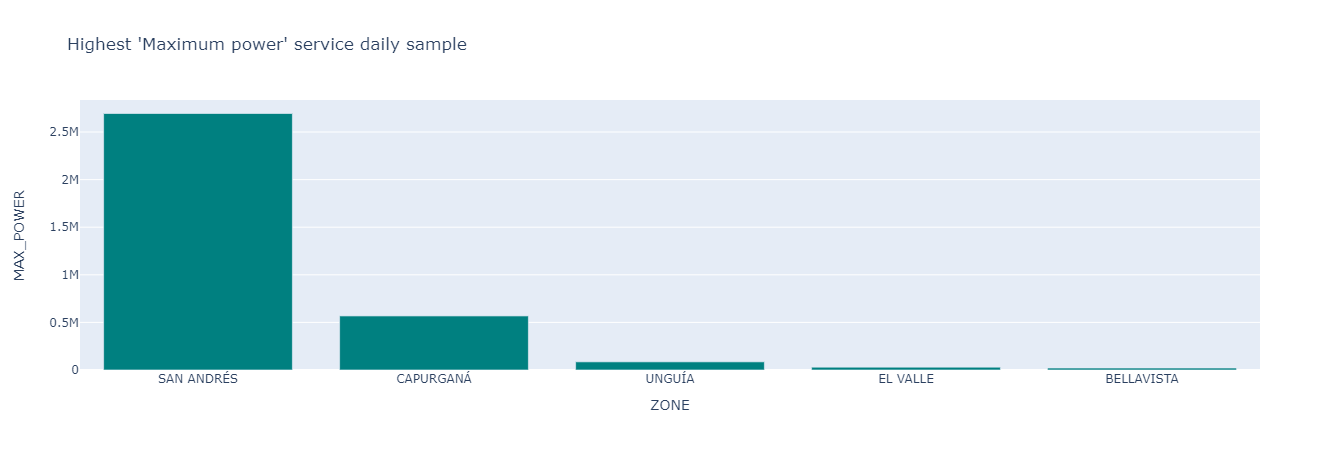

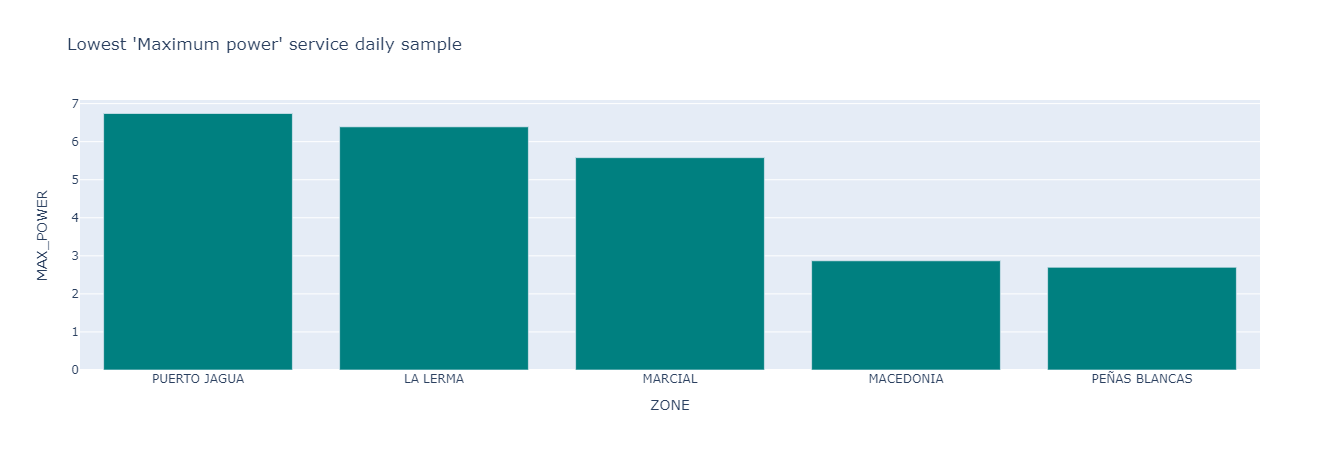

In [20]:
show_max_power('ZONE')

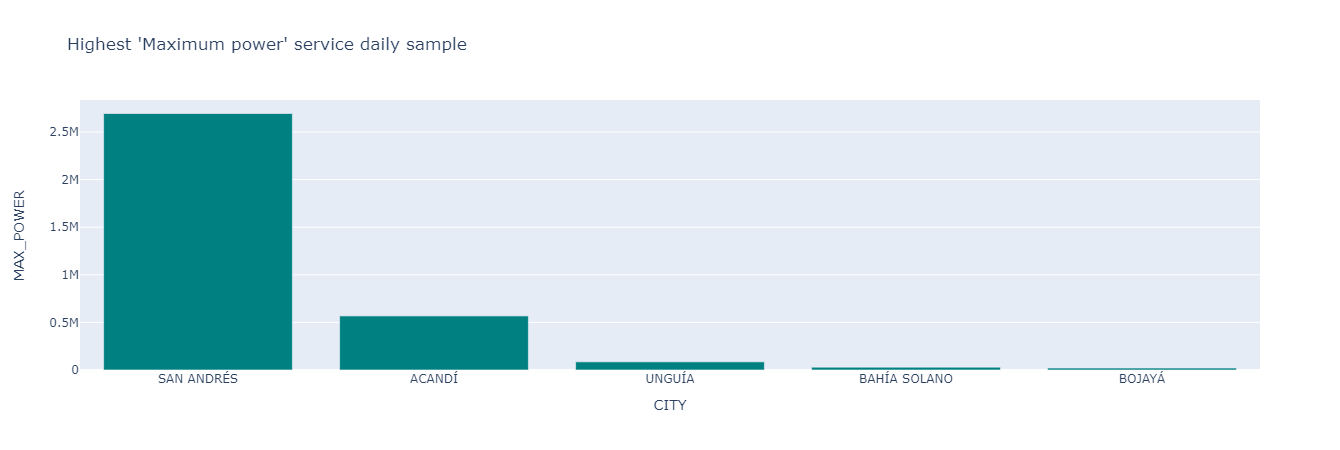

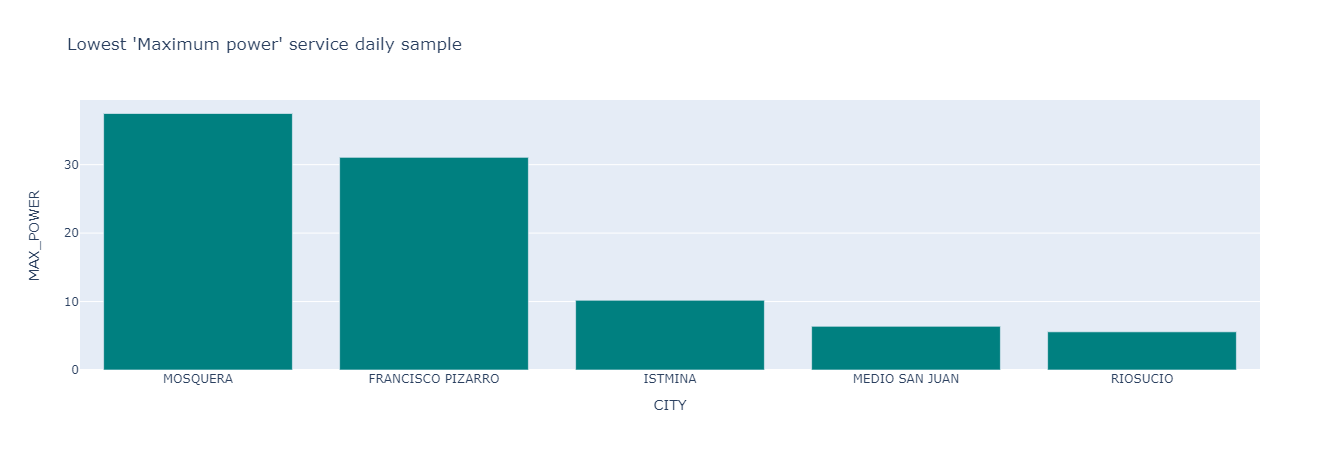

In [21]:
show_max_power('CITY')

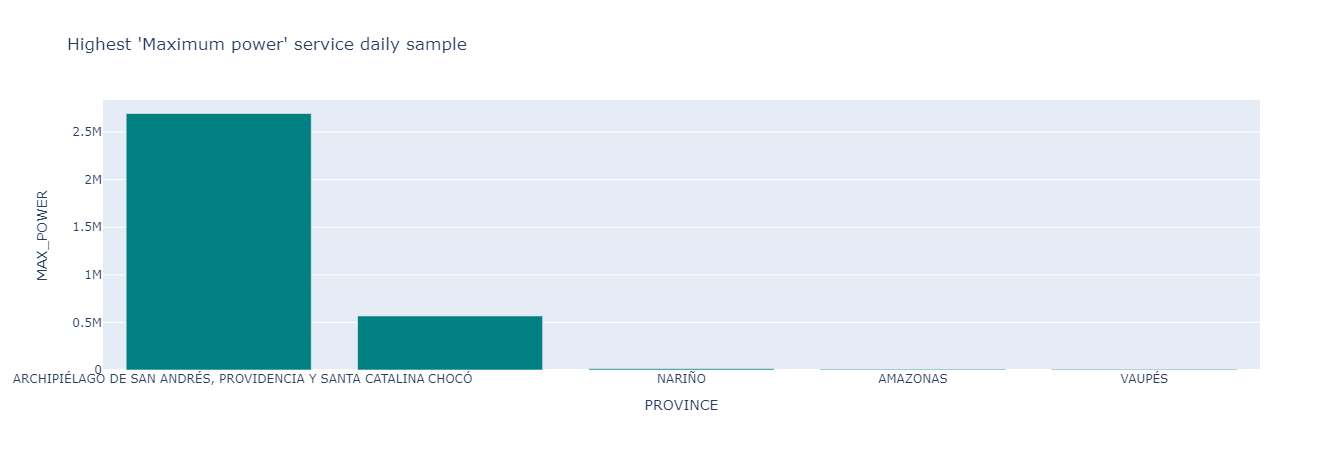

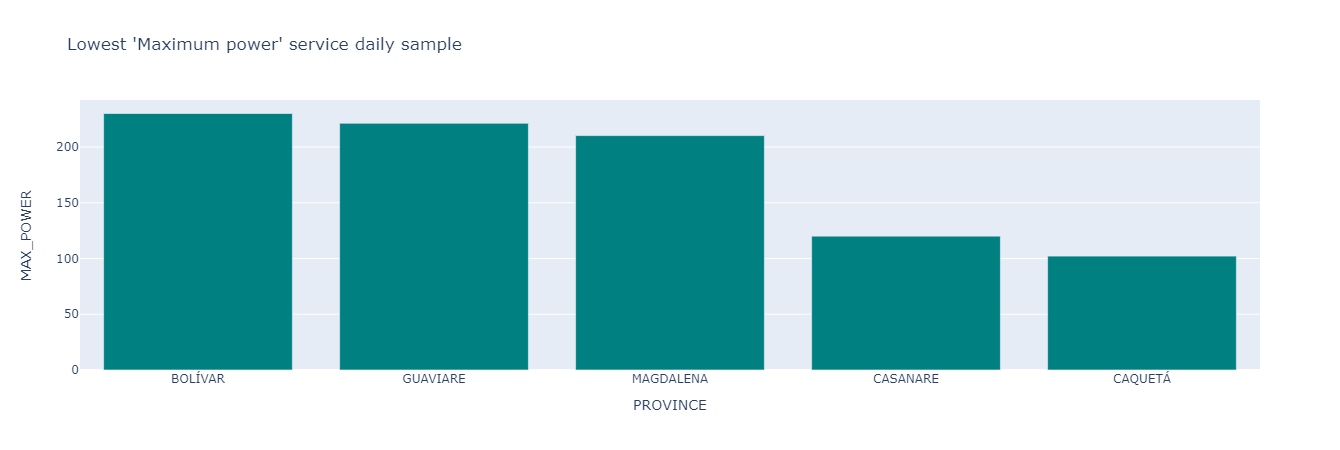

In [22]:
show_max_power('PROVINCE')

### Mean demand

Mean ```ACTIVE_POWER``` for all the zones, grouped by month each year.
The government could implement energetic strategies for this dates of high energy demand

Mean demand per month

In [23]:
def mean_act_energy_year():
    
    years = [2020, 2021,2022,2023]
    result = pd.DataFrame(columns=years)
    
    for year in years:
        power = zni_df.loc[zni_df['SERVICE_YEAR'] == year]
        power = power.groupby('SERVICE_MONTH').ACTIVE_POWER.mean()
        result[year] = power
    
    total_act_energy = zni_df.groupby('SERVICE_MONTH').ACTIVE_POWER.mean()
    result['TOTAL'] = total_act_energy
    return result

In [24]:
mean_act_energy_year = mean_act_energy_year()
mean_act_energy_year

,2020,2021,2022,2023,TOTAL
SERVICE_MONTH,,,,,
1,384705.542169,412738.969697,399346.162500,325189.010989,377222.578125
2,367575.397590,303901.136364,363105.012346,309915.758621,335180.634218
3,418025.986301,336070.709302,443273.179487,178109.620253,341974.512658
4,329223.657895,337564.215909,420625.506329,403252.675676,371598.618297
5,349948.121622,373213.679012,438283.144737,470026.426471,406012.658863
6,364357.014925,436573.037736,397887.644737,467337.059701,414833.973384
7,351828.808219,349461.652174,473877.702703,NaN,388706.799163
8,326263.772152,377426.813953,436959.259740,NaN,379666.971074
9,329964.500000,372945.471910,439419.531646,NaN,380255.846774


In [25]:
mean_act_energy_year = mean_act_energy_year.reset_index()

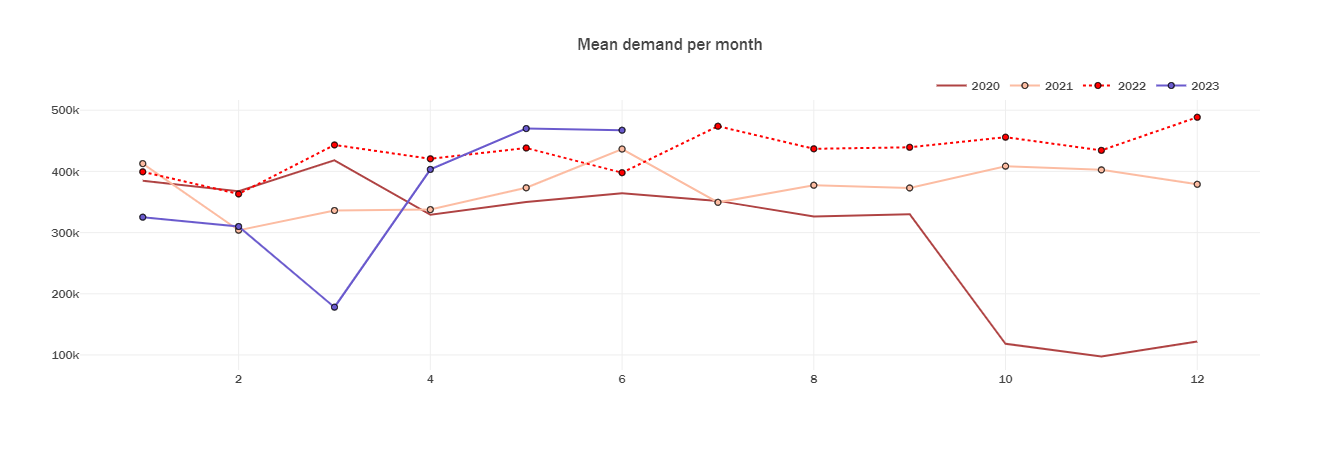

In [26]:
# Create a figure object for which we can later add the plots
fig = go.Figure()

# pass the graph objects to the add trace method, assign a series to x and y parameters of graph objects.
fig.add_trace(go.Scatter(x=mean_act_energy_year['SERVICE_MONTH'], y=mean_act_energy_year[2020], mode='lines',line_color='#AF4343' ,name='2020'))
fig.add_trace(go.Scatter(x=mean_act_energy_year['SERVICE_MONTH'], y=mean_act_energy_year[2021], mode='lines+markers',line_color='#fcbca2' ,name='2021'))

# Customizing a particular line
fig.add_trace(go.Scatter(x=mean_act_energy_year['SERVICE_MONTH'], y=mean_act_energy_year[2022], 
                        mode='lines+markers', name='2022',line_color='red'  ,                   
                        line=dict(color='darkgreen', dash='dot')))

fig.add_trace(go.Scatter(x=mean_act_energy_year['SERVICE_MONTH'], y=mean_act_energy_year[2023], mode='lines+markers',line_color='#6A5ACD' ,name='2023'))
# Further style the figure

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(title="Mean demand per month", showlegend=True, template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=.97),
                  barmode='group', bargap=.15)

Sum of active power each year per location

In [27]:
def loc_act_energy_year(location):
    
    years = [2020, 2021,2022,2023]
    result = pd.DataFrame(columns=years)
    
    for year in years:
        hours = zni_df.loc[zni_df['SERVICE_YEAR'] == year]
        total_hours = hours.groupby(location).ACTIVE_POWER.sum()
        result[year] = total_hours
    
    total_hours = zni_df.groupby(location).ACTIVE_POWER.sum()
    result['TOTAL'] = total_hours
    return result

In [28]:
province_act_energy = loc_act_energy_year('PROVINCE')
city_act_energy = loc_act_energy_year('CITY')
zone_act_energy = loc_act_energy_year('ZONE')

province_act_energy

,2020,2021,2022,2023,TOTAL
PROVINCE,,,,,
AMAZONAS,33287048,44320809,47393932,23099805.0,148101594
ANTIOQUIA,1081104,987743,41479,28626.0,2138952
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",126696193,202647229,220241805,91866125.0,641451352
BOLÍVAR,290582,488669,592657,398430.0,1770338
CAQUETÁ,359759,462076,452480,216340.0,1490655
CASANARE,144559,140621,77253,NaN,362433
CAUCA,1101804,1313547,1135051,430033.0,3980435
CHOCÓ,27886158,35003576,30637841,12563398.0,106090973
GUAINÍA,18719961,19155112,20268927,371941.0,58515941


Mean monthly active power demand by year

In [29]:
def loc_m_act_energy_year(location):
    
    years = [2020, 2021,2022,2023]
    result = pd.DataFrame(columns=years)
    
    for year in years:
        hours = zni_df.loc[zni_df['SERVICE_YEAR'] == year]
        total_hours = hours.groupby(location).ACTIVE_POWER.mean()
        result[year] = total_hours
    
    total_hours = zni_df.groupby(location).ACTIVE_POWER.mean()
    result['TOTAL'] = total_hours
    return result

In [30]:
province_m_act_energy = loc_m_act_energy_year('PROVINCE')
city_m_act_energy = loc_m_act_energy_year('CITY')
zone_m_act_energy = loc_m_act_energy_year('ZONE')

province_m_act_energy

,2020,2021,2022,2023,TOTAL
PROVINCE,,,,,
AMAZONAS,9.510585e+05,1.266309e+06,1.316498e+06,1.283322e+06,1.194368e+06
ANTIOQUIA,3.276073e+04,3.799012e+04,3.770818e+03,4.771000e+03,2.814411e+04
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",7.038677e+06,1.266545e+07,9.176742e+06,8.351466e+06,9.296396e+06
BOLÍVAR,1.162328e+04,1.527091e+04,1.795930e+04,2.213500e+04,1.639202e+04
CAQUETÁ,1.027883e+04,9.430122e+03,9.426667e+03,9.833636e+03,9.679578e+03
CASANARE,1.204658e+04,1.171842e+04,1.287550e+04,NaN,1.208110e+04
CAUCA,8.284241e+03,7.505983e+03,7.993317e+03,7.288695e+03,7.820108e+03
CHOCÓ,1.212442e+05,1.259121e+05,1.215787e+05,8.785593e+04,1.174872e+05
GUAINÍA,7.799984e+05,9.121482e+05,9.213149e+05,6.199017e+04,8.015882e+05


On the other hand, we can see there is a big difference between the mean active power service by province, where San Andrés, Providencia and Santa Catalina has almost 70% of the total power service of the non-interconnected areas.

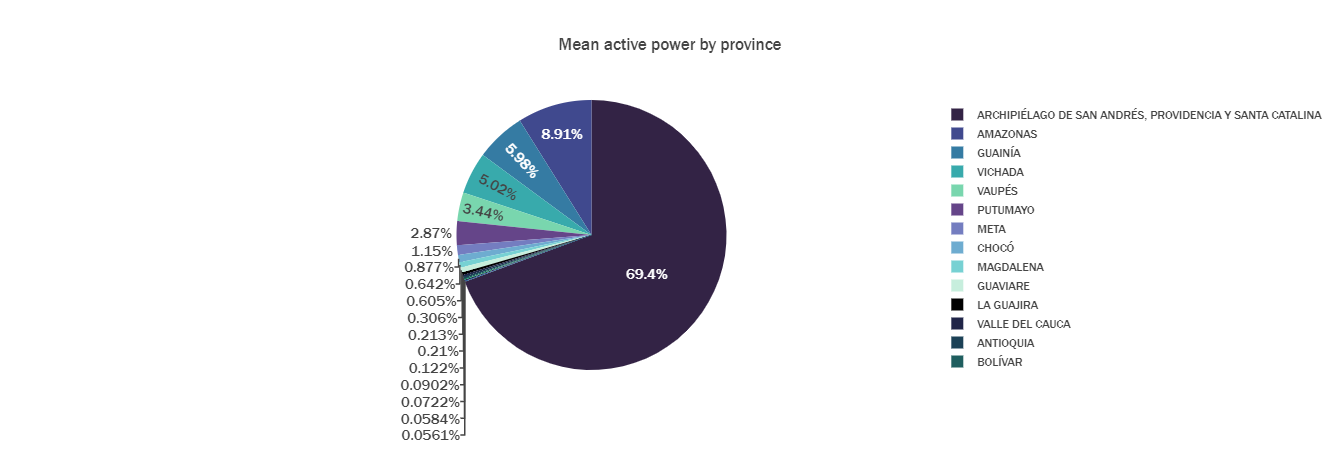

In [31]:
pal = sns.color_palette("mako", 5).as_hex()
province_m_act_energy = province_m_act_energy.reset_index()

fig = px.pie(province_m_act_energy, values='TOTAL', names='PROVINCE', title='Mean active power by province',color_discrete_sequence=pal)

#fig.update_traces(hoverinfo='label+percent', textfont_size=15, 
#                  textinfo="label+percent ", pull=[0.05, 0, 0, 0, 0],
#                  marker_line=dict(color="#FFFFFF", width=2))

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_layout(template=temp, title='Mean active power by province', 
                  uniformtext_minsize=15, uniformtext_mode='hide',width=800)
fig.show()

### Hours demanded

* Hours of energy per zone per year

Allow us to know the number of zones with less than 12h of energy and how has changed this situation over the 3 years (increased or decreased the # of zones in this situation)

In [32]:
def sum_h_year(location):
    
    years = [2020, 2021,2022,2023]
    result = pd.DataFrame(columns=years)
    
    for year in years:
        hours = zni_df.loc[zni_df['SERVICE_YEAR'] == year]
        total_hours = hours.groupby(location).DAILY_MEAN_HOURS.mean()
        result[year] = total_hours
    
    total_hours = zni_df.groupby(location).DAILY_MEAN_HOURS.mean()
    result['TOTAL'] = total_hours
    return result

In [33]:
province_hours = sum_h_year('PROVINCE')
city_hours = sum_h_year('CITY')
zone_hours = sum_h_year('ZONE')

province_hours

,2020,2021,2022,2023,TOTAL
PROVINCE,,,,,
AMAZONAS,18.606857,18.235714,19.388333,19.405556,18.844919
ANTIOQUIA,7.392424,7.761923,5.253636,5.931667,7.093947
"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",24.000000,23.974375,23.952083,23.983636,23.974783
BOLÍVAR,8.855600,11.737500,12.975758,11.910000,11.477500
CAQUETÁ,9.656000,8.931429,8.426667,8.379545,8.859935
CASANARE,5.366667,5.515833,5.505000,NaN,5.454000
CAUCA,5.987293,6.902629,6.652887,6.331356,6.527564
CHOCÓ,14.113348,15.544496,15.404603,12.158182,14.604673
GUAINÍA,16.906250,18.652857,19.712273,16.126667,18.190274


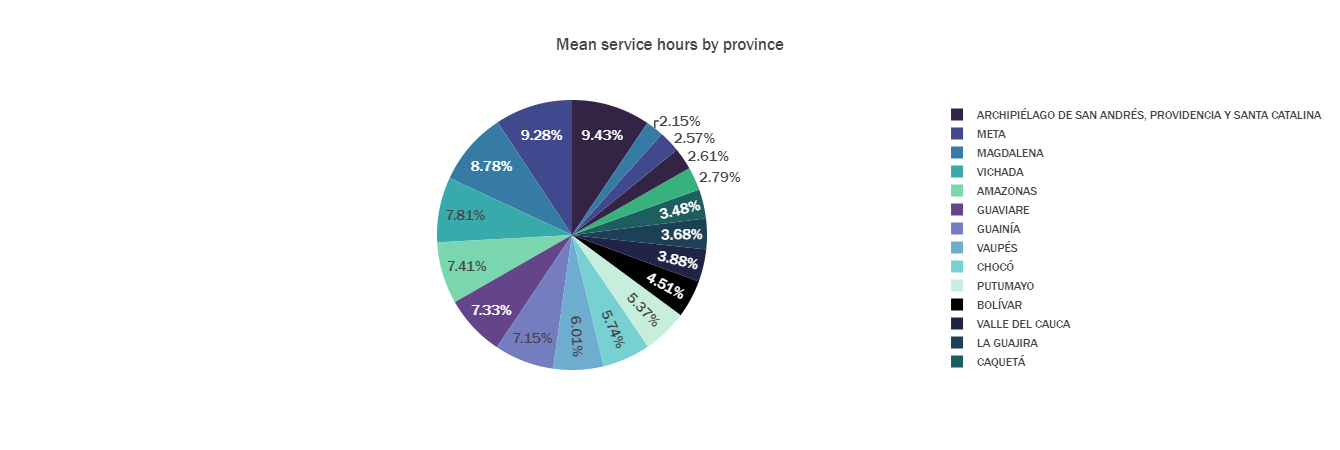

In [34]:
pal = sns.color_palette("mako", 5).as_hex()
province_hours = province_hours.reset_index()

fig = px.pie(province_hours, values='TOTAL', names='PROVINCE', title='Mean service hours by province',color_discrete_sequence=pal)

#fig.update_traces(hoverinfo='label+percent', textfont_size=15, 
#                  textinfo="label+percent ", pull=[0.05, 0, 0, 0, 0],
#                  marker_line=dict(color="#FFFFFF", width=2))

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_layout(template=temp, title='Mean service hours by province', 
                  uniformtext_minsize=15, uniformtext_mode='hide',width=800)
fig.show()

In [35]:
city_hours

,2020,2021,2022,2023,TOTAL
CITY,,,,,
ACANDÍ,18.893636,16.485484,16.339474,16.102000,17.050976
ALTO BAUDÓ (PIE DE PATO),16.417273,23.316667,23.394167,23.400000,21.500488
BAHÍA SOLANO (MUTIS),22.980000,23.434444,23.554516,23.125000,23.304128
BAJO BAUDÓ (PIZARRO),20.560769,15.192800,13.548846,8.807941,13.253571
BARRANCOMINAS,9.849167,12.956000,16.150000,16.126667,13.457750
BOJAYÁ (BELLAVISTA),9.647674,9.250435,10.573438,12.025333,9.993382
BUENAVENTURA,6.980000,7.495333,12.147083,11.556786,9.867667
CARTAGENA DE INDIAS,8.855600,11.737500,12.975758,11.910000,11.477500
CARTAGENA DEL CHAIRÁ,7.663846,8.003846,5.967000,6.772500,6.985185


In [36]:
zone_hours

,2020,2021,2022,2023,TOTAL
ZONE,,,,,
ACANDÍ (ACANDÍ - CHOCÓ),20.606667,21.232500,22.679000,21.315000,21.418750
AMÁRALES (LA TOLA - NARIÑO),6.127500,5.810000,7.018750,6.945000,6.424848
ARUSÍ (NUQUÍ - CHOCO),7.751000,8.952222,NaN,NaN,8.320000
BALBOA (UNGUÍA - CHOCÓ),8.620833,9.637500,10.499167,11.491667,9.858095
BARRANCOMINAS (BARRANCOMINAS - GUAINÍA),9.849167,12.956000,16.150000,16.126667,13.457750
...,...,...,...,...,...
TITUMATE (UNGUÍA - CHOCÓ),5.665000,9.300909,8.475833,8.371667,7.859268
UNGUÍA (UNGUÍA - CHOCÓ),16.285455,21.779000,22.272500,22.235000,20.451538
VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA),5.919167,5.785455,5.253636,5.931667,5.701250


### Zones in 2023 divided by amount of daily hours

In [37]:
names_24to18,names_17to12,names_11to6,names_5to0 = [], [], [], []
n_24to18,n_17to12,n_11to6,n_5to0= 0,0,0,0

for i in range(0,102):
    if zone_hours['TOTAL'].iloc[i] >17:
        
        n_24to18 += 1
        names_24to18.append(zone_hours['TOTAL'].index[i])

    elif zone_hours['TOTAL'].iloc[i] <= 17 and zone_hours['TOTAL'].iloc[i] >=12:

        n_17to12 += 1
        names_17to12.append(zone_hours['TOTAL'].index[i])
        
    elif zone_hours['TOTAL'].iloc[i] <= 11 and zone_hours['TOTAL'].iloc[i] >=6:

        n_11to6 += 1
        names_11to6.append(zone_hours['TOTAL'].index[i])
    
    else:

        n_5to0 += 1
        names_5to0.append(zone_hours['TOTAL'].index[i])
    
print(f'Number of zones with 24 to 18 hours of energy: {n_24to18}')
print(f'These zones are: {names_24to18}')

Number of zones with 24 to 18 hours of energy: 26
These zones are: ['ACANDÍ (ACANDÍ - CHOCÓ)', 'CAPURGANÁ (ACANDÍ - CHOCO)', 'CIUDAD BAUDÓ - PIE DE PATO (ALTO BAUDÓ - CHOCÓ)', 'CIUDAD MUTIS (BAHÍA SOLANO - CHOCÓ)', 'COMUNIDAD INDÍGENA DE PANGUÍ - EL YUCAL (NUQUÍ - CHOCÓ)', 'CUMARIBO (CUMARIBO - VICHADA)', 'CUPICA (BAHÍA SOLANO - CHOCÓ)', 'EL VALLE (BAHÍA SOLANO - CHOCÓ)', 'INÍRIDA (INÍRIDA - GUAINÍA)', 'JURADÓ (JURADÓ - CHOCÓ)', 'LA PRIMAVERA (LA PRIMAVERA - VICHADA)', 'LETICIA (LETICIA - AMAZONAS)', 'MAPIRIPÁN (MAPIRIPÁN - META)', 'MIRAFLORES (MIRAFLORES - GUAVIARE)', 'MITÚ (MITÚ - VAUPÉS)', 'NUQUÍ (NUQUÍ - CHOCÓ)', 'PALMOR (CIÉNAGA - MAGDALENA)', 'PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)', 'PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA)', 'PUERTO CARREÑO (PUERTO CARREÑO - VICHADA)', 'PUERTO LEGUÍZAMO (PUERTO LEGUÍZAMO - PUTUMAYO)', 'PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)', 'SAN ANDRÉS (SAN ANDRÉS - ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA)', 'SANTA GENOVEVA DE D

Hours of power consumption:

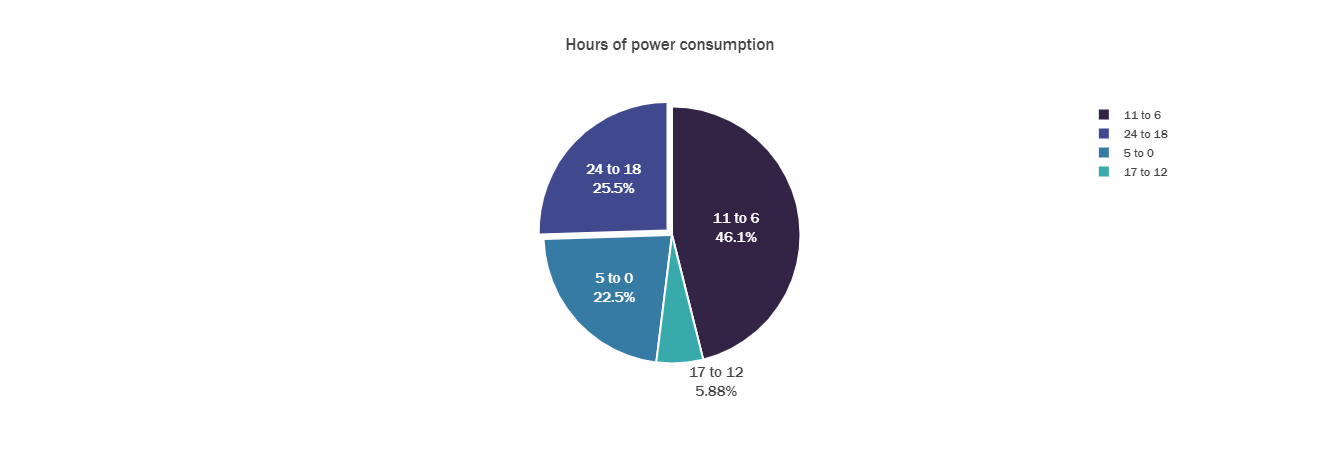

In [38]:
pal = sns.color_palette("mako", 5).as_hex()

dic = {'Number of hours':['24 to 18','17 to 12', '11 to 6','5 to 0'],
      'Value':[n_24to18,n_17to12,n_11to6,n_5to0]}

n_hours_per_zone = pd.DataFrame(dic)

fig = px.pie(n_hours_per_zone, values='Value', names='Number of hours', title='Hours of power consumption',color_discrete_sequence=pal)

fig.update_traces(hoverinfo='label+percent', textfont_size=15, 
                  textinfo="label+percent ", pull=[0.05, 0, 0, 0, 0],
                  marker_line=dict(color="#FFFFFF", width=2))

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_layout(template=temp, title='Hours of power consumption', 
                  uniformtext_minsize=15, uniformtext_mode='hide',width=800)
fig.show()

As we can see, almost half of the zones have just 6 to 11 hours of energy, and what is worst, almost a quarter have only 0 to 5 hours of energy per day. This shows that there is still a need for an appropiate power supply.

### Power factor

Another variable that could be usefull for tracking the performance of the electric systems is the power factor. We can calculate it easily through the ecuation: 

$$
\text{Power Factor (PF)} = \frac{P}{\sqrt{P^2 + Q^2}}
$$

In this formula:

- \(P\) represents the active power (measured in watts, W).
- \(Q\) represents the reactive power (measured in volt-amperes reactive, VAR).


The power factor is a dimensionless value that quantifies how effectively electrical power is being converted into useful work in an electrical circuit. A higher power factor (closer to 1) indicates a more efficient use of power.
    
After calculating its value for each sample we can add it to a new column of the dataset to analyze and visualize

In [39]:
import math

P = zni_df['ACTIVE_POWER']
Q =  zni_df['REACTIVE_POWER']

# Calculate the Power Factor for each row
def calculate_power_factor(row):
    if row['ACTIVE_POWER'] !=0 and row['REACTIVE_POWER'] !=0:
        return row['ACTIVE_POWER'] / math.sqrt(row['ACTIVE_POWER']**2 + row['REACTIVE_POWER']**2)
    else:
        return 0
    
zni_df['POWER_FACTOR'] =  zni_df.apply(calculate_power_factor, axis=1)
zni_df['POWER_FACTOR']

0       0.952888
1       0.944028
2       0.926629
3       0.971081
4       0.971695
          ...   
3289    0.920369
3290    0.964769
3291    0.952027
3292    0.927925
3293    0.949064
Name: POWER_FACTOR, Length: 3294, dtype: float64

Let's check what are the zones with the best and the worst power factor

In [40]:
zni_df.groupby('ZONE').POWER_FACTOR.mean().sort_values(ascending=False)

ZONE
PAPAYAL 1 (BUENAVENTURA - VALLE DEL CAUCA)         0.999113
VEGÁEZ (VIGÍA DEL FUERTE - ANTIOQUIA)              0.991036
BUENAVISTA (BAJO BAUDÓ (PIZARRO) - CHOCÓ)          0.990189
PANAMACITO                                         0.989082
PITAL (BUENAVENTURA - VALLE DEL CAUCA)             0.988967
                                                     ...   
MARCIAL (RIOSUCIO - CHOCÓ)                         0.655576
LA ENSENADA (SANTA BÁRBARA (ISCUANDÉ) - NARIÑO)    0.627019
LA ISLA (MAGÜÍ - NARIÑO)                           0.598887
MACEDONIA (MEDIO SAN JUAN - CHOCÓ)                 0.199985
MOSQUERA (MOSQUERA - NARIÑO)                       0.000000
Name: POWER_FACTOR, Length: 133, dtype: float64

In [41]:
#Show first 5 zones with lowest and highest 'max power' values
def show_power_factor(location):
    power_factor = zni_df.groupby(location).POWER_FACTOR.mean().sort_values(ascending=False)
    power_factor = pd.DataFrame(power_factor).reset_index()

    # Remove parentheses and their contents for visualization purposes
    power_factor[location] = power_factor[location].str.replace(r'\s*\(.*\)', '', regex=True)

    #print(max_power)

    # Create bar chart
    fig=px.bar(power_factor[:5],x=location,y="POWER_FACTOR",title="Highest 'POWER_FACTOR'")
    # Update marker color
    fig.update_traces(marker=dict(color='#008080'))

    # Set automargin for x-axis tick labels to True
    fig.update_xaxes(automargin=True)

    # Show the plot
    fig.show()

    # Create bar chart
    fig=px.bar(power_factor[-5:],x=location,y="POWER_FACTOR",title="Lowest 'POWER_FACTOR'")
    # Update marker color
    fig.update_traces(marker=dict(color='#008080'))

    # Set automargin for x-axis tick labels to True
    fig.update_xaxes(automargin=True)

    # Show the plot
    fig.show()

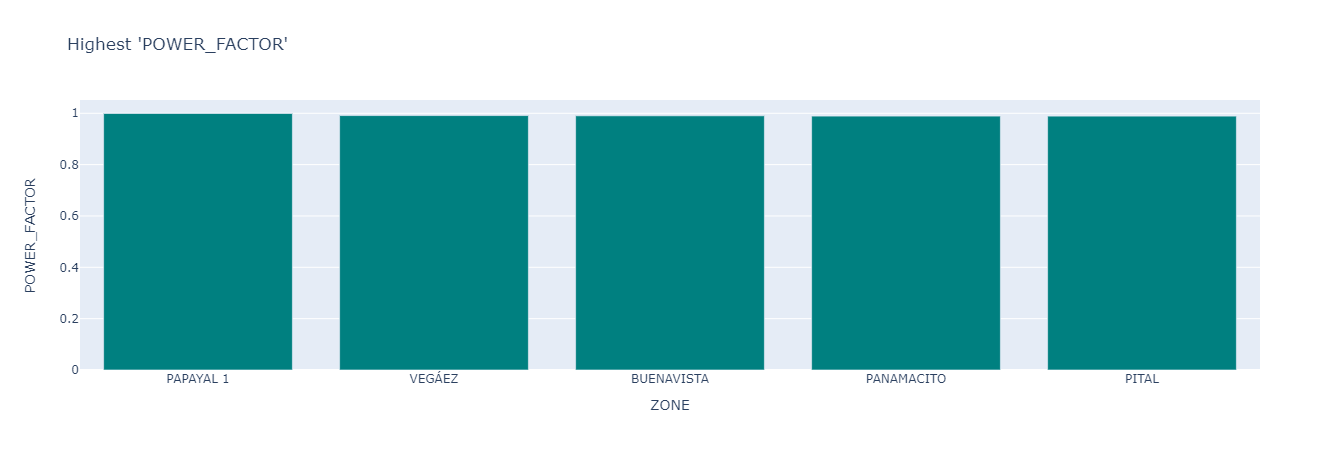

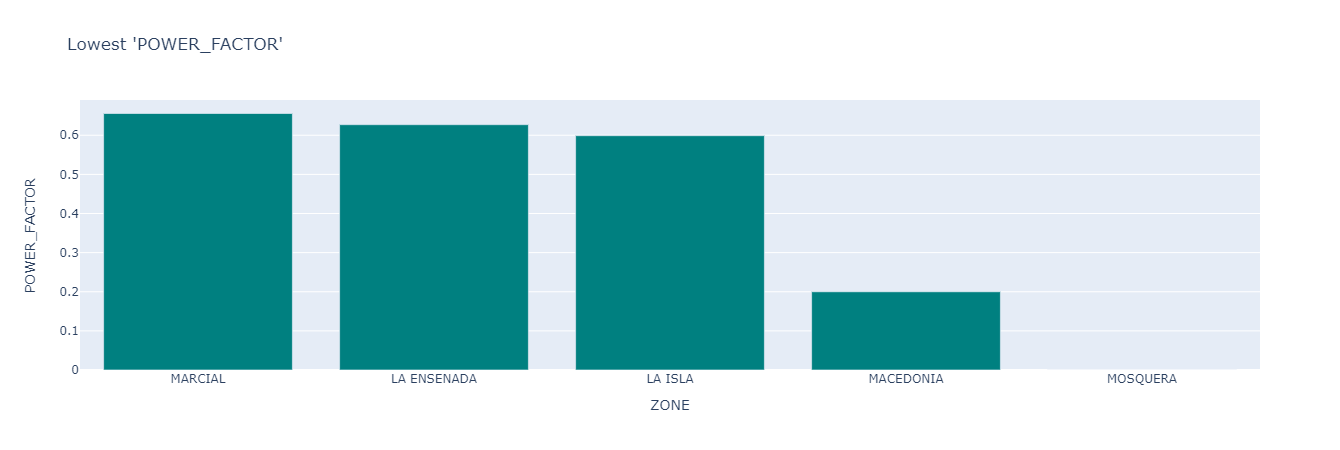

In [42]:
show_power_factor('ZONE')

### Analysis for the zone with the greatest power consumption
 
 From the previous visualizations we could see that the zone with the greatest power consumption by far was San Andrés island. Because of this, it is important to know the its energy source:
 
 As it is mentioned in the article of the National University of Colombia (UNAL) [1](https://agenciadenoticias.unal.edu.co/detalle/con-energia-solar-san-andres-ahorraria-hasta-60000-millones-de-pesos-al-ano):
> "Currently, **the energy supply in San Andrés comes from fossil fuels**. However, if 30% of the way electricity is generated today was replaced by solar energy, **the Island would save up to 60,000 million pesos per year** and around **32,000 tons of carbon dioxide (CO2) emissions into the atmosphere would be reduced**. A necessary commitment in the midst of the climate crisis that affects the planet."

The great impact that this zone has in the environment shows the need for projects for an energetic transition into renewable energies.

In [43]:
province_hours.iloc[0][:-1]

PROVINCE     AMAZONAS
2020        18.606857
2021        18.235714
2022        19.388333
2023        19.405556
Name: 0, dtype: object

<a id="DV"></a>
## <b><span style='color:#008080'>2.5</span> | Data visualization for a chosen zone</b>

- The dataset contains more than a hundred of zones, making it hard to visualize some data for each of them. Because of this, we can use this section of the notebook to visualize some of the data from the analysis for a chosen zone

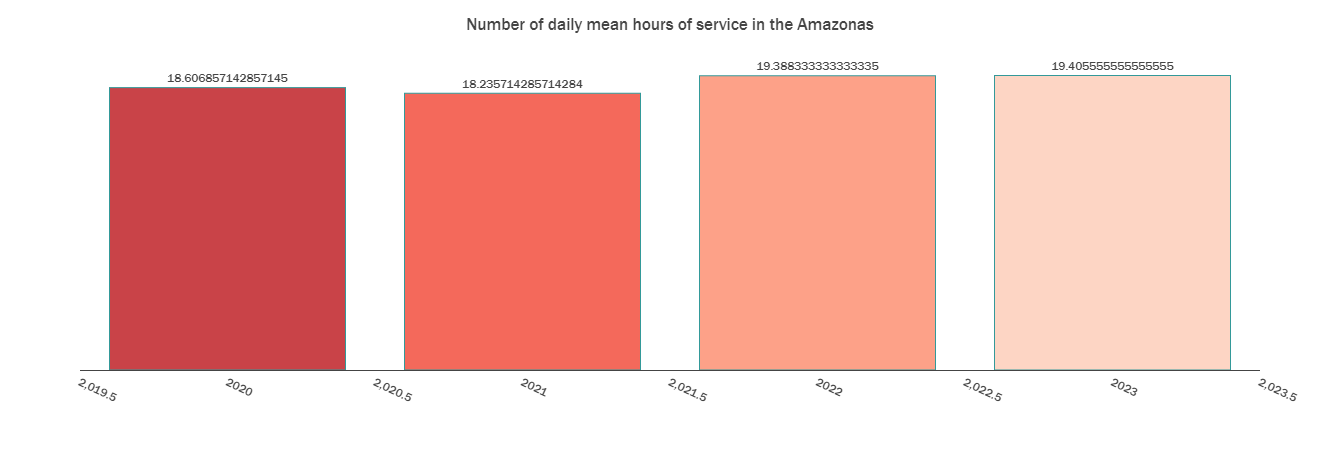

In [44]:
pal = sns.color_palette("Reds_r", 4).as_hex()

fig = px.bar(x=['2020','2021','2022','2023'],
             y=province_hours.iloc[0][1:-1],
             text=province_hours.iloc[0][1:-1], 
             color=['2020','2021','2022','2023'],
             color_discrete_sequence=pal, opacity=0.8)

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_traces(texttemplate='%{text}', textposition='outside',
                  marker_line=dict(width=1, color='#008080'))
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(template=temp, title_text='Number of daily mean hours of service in the Amazonas', 
                  xaxis=dict(title='', tickangle=25, showline=True), 
                  height=450, width=700, showlegend=False)
fig.show()

<a id="ZWCD"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">3| Zones with complete data</p>

Knowing that only a few zones have a complete number of samples, we are going to make a forecasting of the active power consumption only for these zones.

As we can see below, there would be 294 samples for this analysis divided in 42 samples for each of the 7 zones.

<a id="PD"></a>
## <b><span style='color:#008080'>3.1</span> | Power Demand</b>

In [45]:
df_ZNI2 = zni_df.loc[zni_df.ZONE.isin(names_complete)]
df_ZNI2

,PROVINCE_ID,PROVINCE,CITY_ID,CITY,ZONE_ID,ZONE,SERVICE_YEAR,SERVICE_MONTH,ACTIVE_POWER,REACTIVE_POWER,MAX_POWER,MAX_DEMAND_DAY,MAX_DEMAND_DATE,DAILY_MEAN_HOURS,POWER_FACTOR
1,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2020,1,103897,36304,227.04,miércoles,01/22/2020 07:15:00 PM,24.00,0.944028
21,19,CAUCA,19809,TIMBIQUÍ,19809003,COTEJE (TIMBIQUÍ - CAUCA),2020,1,5137,3129,34.04,sábado,01/18/2020 07:45:00 PM,5.46,0.854041
32,27,CHOCÓ,27075,BAHÍA SOLANO (MUTIS),27075002,EL VALLE (BAHÍA SOLANO - CHOCÓ),2020,1,150660,70006,312.05,viernes,01/31/2020 07:15:00 PM,23.52,0.906879
33,27,CHOCÓ,27077,BAJO BAUDÓ (PIZARRO),27077000,PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ),2020,1,186716,83630,533.81,viernes,01/17/2020 07:30:00 PM,20.54,0.912637
34,27,CHOCÓ,27099,BOJAYÁ (BELLAVISTA),27099000,BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ),2020,1,79288,28402,242.36,sábado,01/18/2020 07:45:00 PM,14.56,0.941422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,27,CHOCÓ,27075,BAHÍA SOLANO (MUTIS),27075002,EL VALLE (BAHÍA SOLANO - CHOCÓ),2023,6,172661,63485,379.37,domingo,06/11/2023 07:15:00 PM,23.18,0.938567
3256,27,CHOCÓ,27077,BAJO BAUDÓ (PIZARRO),27077000,PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ),2023,6,232561,100032,454.61,lunes,06/05/2023 07:15:00 PM,22.88,0.918625
3258,27,CHOCÓ,27099,BOJAYÁ (BELLAVISTA),27099000,BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ),2023,6,100603,32072,240.87,miércoles,06/07/2023 07:45:00 PM,17.73,0.952756
3262,27,CHOCÓ,27425,MEDIO ATRATO (BETÉ),27425000,BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ),2023,6,15563,14736,60.00,jueves,06/01/2023 12:15:00 PM,11.91,0.726137


In [46]:
df_ZNI2.ZONE.value_counts()

ZONE
PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS)    42
COTEJE (TIMBIQUÍ - CAUCA)                   42
EL VALLE (BAHÍA SOLANO - CHOCÓ)             42
PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)      42
BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ)    42
BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ)          42
BALBOA (UNGUÍA - CHOCÓ)                     42
Name: count, dtype: int64

Min and max potencia demandada

In [47]:
df_ZNI2.groupby(['ZONE']).MAX_POWER.agg([min, max])

,min,max
ZONE,,
BALBOA (UNGUÍA - CHOCÓ),73.16,91.04
BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ),207.17,20949.00
BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ),52.00,7600.00
COTEJE (TIMBIQUÍ - CAUCA),30.08,39.72
EL VALLE (BAHÍA SOLANO - CHOCÓ),295.15,29700.00
PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ),365.90,533.81
PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),177.76,255.38


In [48]:
df_ZNI2.groupby(['ZONE']).ACTIVE_POWER.agg([min, max])

,min,max
ZONE,,
BALBOA (UNGUÍA - CHOCÓ),15223,24801
BELLAVISTA (BOJAYÁ (BELLAVISTA) - CHOCÓ),26895,107314
BETÉ (MEDIO ATRATO (BETÉ) - CHOCÓ),5435,21814
COTEJE (TIMBIQUÍ - CAUCA),4501,7629
EL VALLE (BAHÍA SOLANO - CHOCÓ),132657,175887
PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ),20858,243435
PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),10325,123286


Mean active power by year:

In [49]:
def mean_act_energy_year_complete():
    
    years = [2020, 2021,2022,2023]
    result = pd.DataFrame(columns=years)
    
    for year in years:
        power = df_ZNI2.loc[zni_df['SERVICE_YEAR'] == year]
        power = power.groupby('SERVICE_MONTH').ACTIVE_POWER.mean()
        result[year] = power
    
    total_act_energy = df_ZNI2.groupby('SERVICE_MONTH').ACTIVE_POWER.mean()
    result['TOTAL'] = total_act_energy
    return result

In [50]:
act_energy_complete_z = mean_act_energy_year_complete()
act_energy_complete_z = act_energy_complete_z.reset_index()

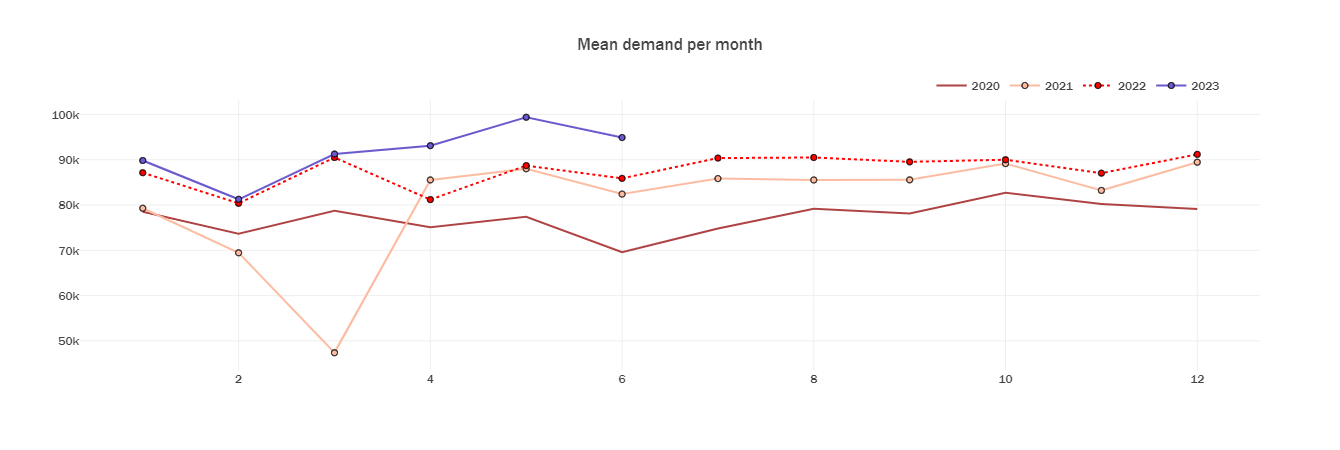

In [51]:
# Create a figure object for which we can later add the plots
fig = go.Figure()

# pass the graph objects to the add trace method, assign a series to x and y parameters of graph objects.
fig.add_trace(go.Scatter(x=act_energy_complete_z['SERVICE_MONTH'], y=act_energy_complete_z[2020], mode='lines',line_color='#AF4343' ,name='2020'))
fig.add_trace(go.Scatter(x=act_energy_complete_z['SERVICE_MONTH'], y=act_energy_complete_z[2021], mode='lines+markers',line_color='#fcbca2' ,name='2021'))

# Customizing a particular line
fig.add_trace(go.Scatter(x=act_energy_complete_z['SERVICE_MONTH'], y=act_energy_complete_z[2022], 
                        mode='lines+markers', name='2022',line_color='red'  ,                   
                        line=dict(color='darkgreen', dash='dot')))

fig.add_trace(go.Scatter(x=act_energy_complete_z['SERVICE_MONTH'], y=act_energy_complete_z[2023], mode='lines+markers',line_color='#6A5ACD' ,name='2023'))
# Further style the figure

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(title="Mean demand per month", showlegend=True, template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=.97),
                  barmode='group', bargap=.15)

Let's add the date column for unifying month and year and use it later in the forecasting:

In [52]:
# Creating a new column 'Date' by combining 'Month' and 'Year'
df_ZNI2['DATE'] = pd.to_datetime(df_ZNI2['SERVICE_YEAR'].astype(str) + '-' + df_ZNI2['SERVICE_MONTH'].astype(str), format='%Y-%m')
df_ZNI2['DATE'] = df_ZNI2['DATE'].apply(lambda x: x.strftime('%Y-%m'))
df_ZNI2['DATE']

1       2020-01
21      2020-01
32      2020-01
33      2020-01
34      2020-01
         ...   
3252    2023-06
3256    2023-06
3258    2023-06
3262    2023-06
3265    2023-06
Name: DATE, Length: 294, dtype: object

<a id="F"></a>
## <b><span style='color:#008080'>3.2</span> | Forecasting</b>

Forecasting for the zone with the greatest active power between the zones with complete data: PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)

The code for the forecasting was taken from the tutorial: [A Guide to Time Series Forecasting in Python](https://builtin.com/data-science/time-series-forecasting-python)

### Creation of the df for the zone

In [53]:
df_pizarro = df_ZNI2.loc[df_ZNI2.ZONE == 'PIZARRO (BAJO BAUDÓ (PIZARRO) - CHOCÓ)']
df_pizarro.index = pd.to_datetime(df_pizarro['DATE'], format='%Y-%m')
df_pizarro = pd.DataFrame(df_pizarro['ACTIVE_POWER'])

In [54]:
df_pizarro

,ACTIVE_POWER
DATE,
2020-01-01,186716
2020-02-01,160302
2020-03-01,189549
2020-04-01,188972
2020-05-01,196794
2020-06-01,179367
2020-07-01,182828
2020-08-01,184804
2020-09-01,180481


### Data Split

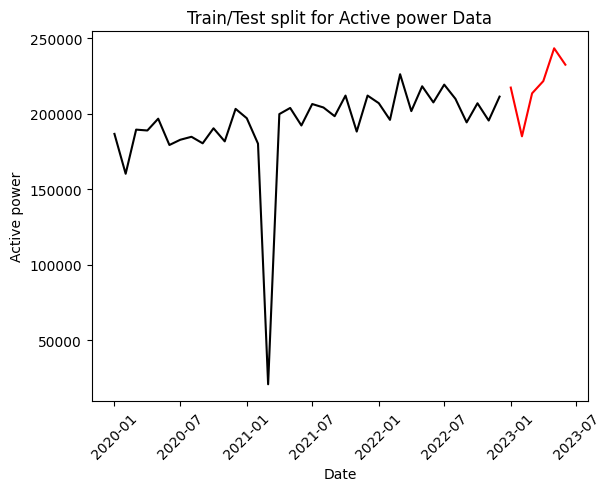

In [55]:
train = df_pizarro[df_pizarro.index < pd.to_datetime("2023-01", format='%Y-%m')]
test = df_pizarro[df_pizarro.index > pd.to_datetime("2022-12", format='%Y-%m')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Active power')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Active power Data")
plt.show()

### Training

#### Autoregressive Moving Average (ARMA)

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['ACTIVE_POWER']

In [57]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [58]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09275D+01    |proj g|=  1.86127D+02

At iterate    5    f=  1.26246D+01    |proj g|=  7.78784D-01

At iterate   10    f=  1.20217D+01    |proj g|=  1.05841D-01

At iterate   15    f=  1.19174D+01    |proj g|=  2.05713D-02

At iterate   20    f=  1.18967D+01    |proj g|=  1.32926D-02

At iterate   25    f=  1.18952D+01    |proj g|=  1.06159D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     27      1     0     0   

 This problem is unconstrained.


In [59]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

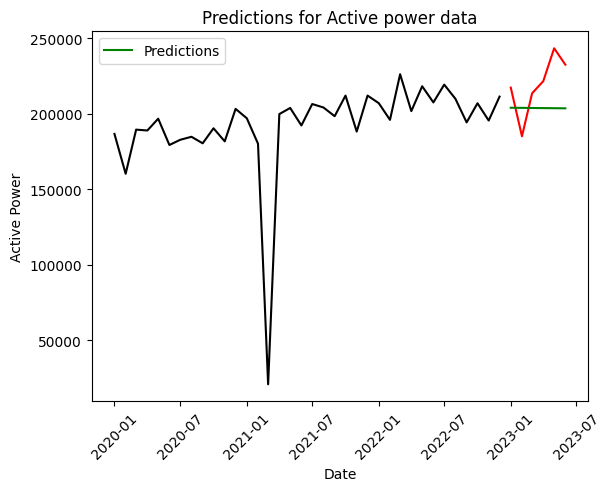

In [60]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('Active Power')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Active power data")
plt.legend()
plt.show()


#### Autoregressive Integrated Moving Average (ARIMA)

In [61]:
from statsmodels.tsa.arima.model import ARIMA

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



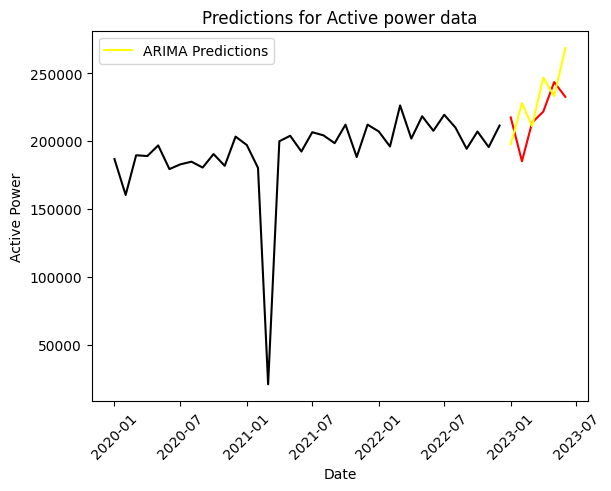

RMSE:  26624.47861559981


In [62]:
ARIMAmodel = ARIMA(y, order = (2,4,5)) #(5,4,4)
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Active Power')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Active power data")
plt.legend()
plt.show()



import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["ACTIVE_POWER"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

### Future predictions

In [63]:
'''ARIMAmodel = ARIMA(y, order = (2,4,5)) 
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(6)
y_pred_df = y_pred.conf_int(alpha = 0.05) 

start_date = pd.to_datetime('2023-07')  # Replace 'your_start_date' with the actual start date
# Set a daily frequency (D), or choose an appropriate frequency based on your data

end_date = pd.to_datetime('2023-12')  # Replace 'your_end_date' with the desired end date


y_pred_df["Predictions"] = ARIMAmodel.predict(start = start_date, end = end_date)
y_pred_df.index = test.index
y_pred_df.index.freq = 'M'
y_pred_out = y_pred_df["Predictions"] 


plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Active Power')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Active power data")
plt.legend()
plt.show()

y_pred_out
'''

'ARIMAmodel = ARIMA(y, order = (2,4,5)) \nARIMAmodel = ARIMAmodel.fit()\n\ny_pred = ARIMAmodel.get_forecast(6)\ny_pred_df = y_pred.conf_int(alpha = 0.05) \n\nstart_date = pd.to_datetime(\'2023-07\')  # Replace \'your_start_date\' with the actual start date\n# Set a daily frequency (D), or choose an appropriate frequency based on your data\n\nend_date = pd.to_datetime(\'2023-12\')  # Replace \'your_end_date\' with the desired end date\n\n\ny_pred_df["Predictions"] = ARIMAmodel.predict(start = start_date, end = end_date)\ny_pred_df.index = test.index\ny_pred_df.index.freq = \'M\'\ny_pred_out = y_pred_df["Predictions"] \n\n\nplt.plot(train, color = "black")\nplt.plot(test, color = "red")\nplt.plot(y_pred_out, color=\'Yellow\', label = \'ARIMA Predictions\')\nplt.ylabel(\'Active Power\')\nplt.xlabel(\'Date\')\nplt.xticks(rotation=45)\nplt.title("Predictions for Active power data")\nplt.legend()\nplt.show()\n\ny_pred_out\n'

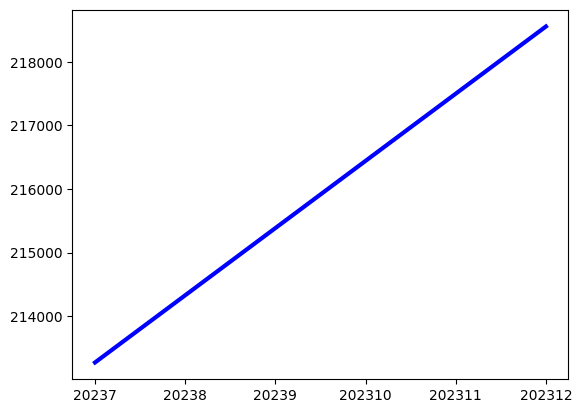

In [64]:
from sklearn.linear_model import LinearRegression
X = np.arange(36)
X = X.reshape(-1, 1)
y = train['ACTIVE_POWER']

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg_predicts = reg.predict(np.array([[37],[38],[39],[40],[41],[42]]))
reg_predicts

plt.plot(['20237','20238','20239','202310','202311','202312'], reg_predicts, color="blue", linewidth=3)

<a id="SWDA"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">4| Solar and wind atlas</p>

Knowing that the trend is to increase the power consumption, it is clear that there would be a need for new energy projects to supply this demand. This could oppen opportunities to fulfill the power demand while making a transition to alternative energy sources like solar or wind energy.

Below we can find data from the Global Solar and Wind Atlas that could help to address needs of policymakers, project developers, financial and academic sectors, as well as professionals and individuals interested in solar and wind energy.

<a id="S"></a>
## <b><span style='color:#008080'>4.1</span> | Solar</b>

The solar GIS data provided by the [Global Solar Atlas](https://globalsolaratlas.info/download/colombia) can be used for visualization, further processing, and geo-analysis. These are provided as raster (gridded) data in GeoTIFF format. Data layers are provided in a geographic spatial reference (EPSG:4326).

Provided data layers include long-term yearly (for PVOUT also monthly) averages of:

* **PVOUT** – Photovoltaic power potential [kWh/kWp], resolution (pixel size) 30 arcsec (nominally 1 km)
* **GHI** – Global horizontal irradiation [kWh/m2], resolution (pixel size) 9 arcsec (nominally 250 m)
* **DIF** – Diffuse horizontal irradiation [kWh/m2], resolution (pixel size) 9 arcsec (nominally 250 m)
* **GTI** – Global irradiation for optimally tilted surface [kWh/m2], resolution (pixel size) 9 arcsec (nominally 250 m)
* **DNI** – Direct normal irradiation [kWh/m2], resolution (pixel size) 9 arcsec (nominally 250 m)
* **OPTA** – Optimum tilt to maximize yearly yield [°], resolution (pixel size) 2 arcmin (nominally 4 km)

Note, that solar paramters might be provided as a calculation of Daily totals or Yearly summaries:

* **LTAy_DailyTotals** - long-term yearly average of daily totals
* **LTAym_YearlyMonthlyTotals** - long-term average of yearly or monthly summaries

**Note**: Both type of data are equivalent. The relation between datasets is described by simple formula

* LTAy_YearlySum = LTAy_DailySum * 365.25

In this case we will visualize the PVOUT, which represents the amount of power generated per unit of the installed PV capacity over the long-term, and it is measured in kilowatthours per installed kilowatt-peak of the system capacity (kWh/kWp).

We can visualize the Photovoltaic power potential [kWh/kWp] below:

In [65]:
import rasterio
import pandas as pd

In [66]:
with rasterio.open('/kaggle/input/colombia-solar-atlas-2019/Colombia_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif') as src:
    # Access raster data and metadata
    solar_raster_data = src.read(1)  # Read the first band, change the band number as needed
    solar_metadata = src.meta


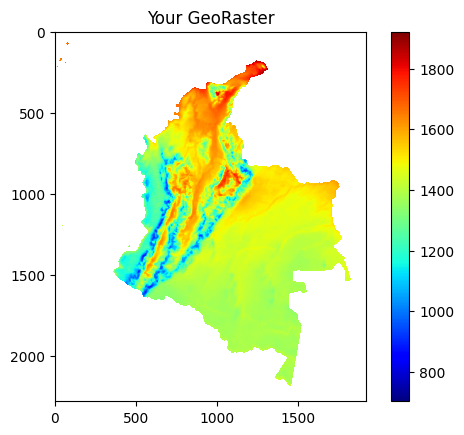

In [67]:
import matplotlib.pyplot as plt

# Display the GeoRaster
plt.imshow(solar_raster_data, cmap='jet')
plt.colorbar()
plt.title('Your GeoRaster')
plt.show()


<a id="W"></a>
## <b><span style='color:#008080'>4.2</span> | Wind</b>

The same GEOTIFF format is presented for the [Global Wind Atlas](https://globalwindatlas.info/es/area/Colombia) to show the Power density in Colombia:

In [68]:
with rasterio.open('/kaggle/input/colombia-wind-atlas-of-power-density/COL_power_density/COL_power-density_10m.tif') as src:
    # Access raster data and metadata
    wind10m_raster_data = src.read(1)  # Read the first band, change the band number as needed
    wind10m_metadata = src.meta

In [69]:
with rasterio.open('/kaggle/input/colombia-wind-atlas-of-power-density/COL_power_density/COL_power-density_50m.tif') as src:
    # Access raster data and metadata
    wind50m_raster_data = src.read(1)  # Read the first band, change the band number as needed
    wind50m_metadata = src.meta

In [70]:
with rasterio.open('/kaggle/input/colombia-wind-atlas-of-power-density/COL_power_density/COL_power-density_100m.tif') as src:
    # Access raster data and metadata
    wind100m_raster_data = src.read(1)  # Read the first band, change the band number as needed
    wind100m_metadata = src.meta

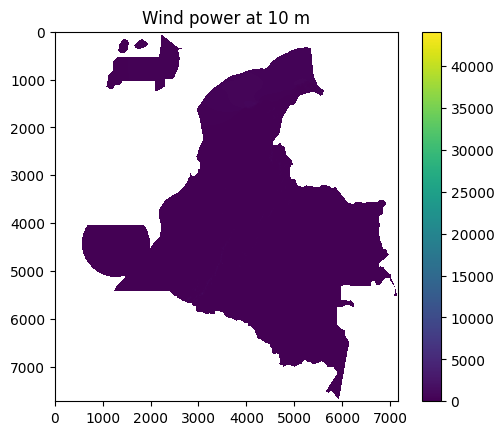

In [71]:
# Display the GeoRaster
plt.imshow(wind10m_raster_data, cmap='viridis')
plt.colorbar()
plt.title('Wind power at 10 m')
plt.show()


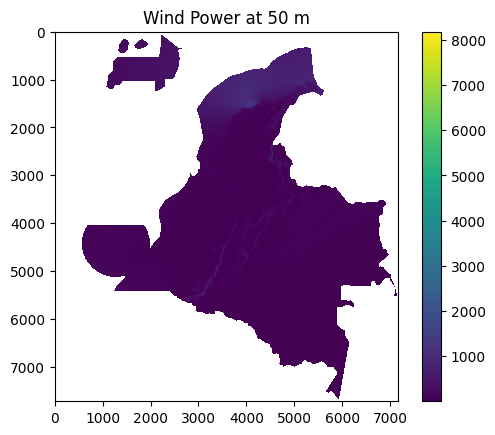

In [72]:
# Display the GeoRaster
plt.imshow(wind50m_raster_data, cmap='viridis')
plt.colorbar()
plt.title('Wind Power at 50 m')
plt.show()

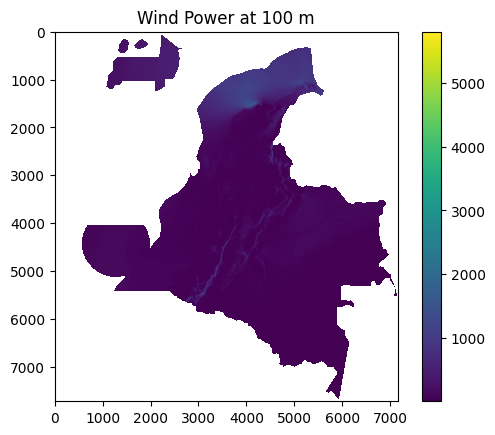

In [73]:
# Display the GeoRaster
plt.imshow(wind100m_raster_data, cmap='viridis')
plt.colorbar()
plt.title('Wind Power at 100 m')
plt.show()

<a id="CPD"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">6| Comparing production and consumption</p>

<a id="C"></a>
# <p style="background-color:'white';font-family:newtimeroman;font-size:150%;color:#008080;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #008080;">6| Conclusions</p>



* It can be concluded that the NIZ with the highest priority about energy projects for its high power demand and continuos hours of consumption its the San Andres island
* An improvement in the NIZ energy system is needed as they are zones with minimum hours of service, almost half of the zones having just 6 to 11 hours of energy, and what is worst, almost a quarter have only 0 to 5 hours of energy per day. This shows that there is still a need for an appropiate power supply as well as for a low power factor in some of the zones which indicates that there could be high energy losses in those systems.
* There is a clear need to improve telemetry systems maintanence and coverage as they go out of service frecuently and only consider the 7.8% of the Non-interconnected zones, limitating potential energy analysis projects and deployment due to the lack of information about energy consumption in these zones. 
* The study shows some data for energy demand for each zone that could be used in the future to compare with the natural resources in each area to generate renewable energy solutions using datasets as the [Wind Speed](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8), the [Global wind atlas](https://globalwindatlas.info/es/area/Colombia), [rivers flow level](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-M-ximo/vfth-yucv) or the [solar map](http://atlas.ideam.gov.co/visorAtlasRadiacion.html) and seek for potential projects of photovoltaic, wind power and hidroelectric power generation.


<div style="border-radius:10px; border:#008080 solid; padding: 15px; background-color: #F5FFFA; font-size:100%; text-align:left">


### 📌 A more friendly and summarized visualization from this notebook can be reach out at the streamlit web page: *https://kagglexcohort3-niz.streamlit.app/*